In [52]:
import cv2
import pandas as pd
import seaborn as sns

In [53]:
# データ読み込み
img = cv2.imread("./モビリタ_20240821/スクショ.png")


ksize = 3
# 中央値フィルタ
img_mask = cv2.medianBlur(img, ksize)


# グレースケール化と2値化
img_gray = cv2.cvtColor(img_mask, cv2.COLOR_BGR2GRAY)
# 二値化(閾値100を超えた画素を255にする。
ret2, img_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
# cv2.imwrite(filename="./test.png", img=img_otsu)

# 画像の大きさを作成
Y, X, _ = img.shape


In [54]:
img.shape

(237, 706, 3)

In [55]:
columns = ["x", "y"]
df = pd.DataFrame(columns=columns, index=[0])

# 横軸の点群検出
# https://kitakantech.com/opencv-cv2imread/
# グレースケール値の参考
for i, index in enumerate(img_otsu):
    for j, cell in enumerate(index):
        if 0 == cell:
            d = {"y": i, "x": j}
            dff = pd.DataFrame(d, index=[0])
            df = pd.concat([df, dff])


In [56]:
X_DEFAULT = 250
Y_DEFAULT = 100

In [57]:
df.reset_index(inplace=True)
df = df[["x", "y"]]
df

dff = df.groupby(["x"]).mean().reset_index()

# dff["y"] = dff["y"]/
dff["x"] = dff["x"] / X * X_DEFAULT
dff["y"] = dff["y"] / Y * Y_DEFAULT

dff.to_csv("./test.csv", index=False)

<Axes: xlabel='x', ylabel='y'>

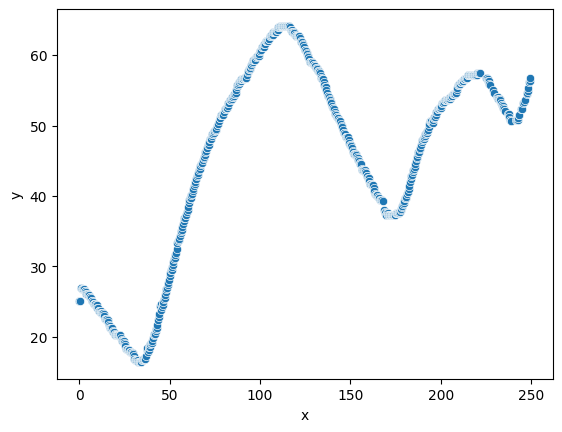

In [58]:
sns.scatterplot(data=dff, x="x", y="y")

In [82]:
# 余計な線を消す

import cv2
import numpy as np

img = cv2.imread("./モビリタ_20240821/スクショ5.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ksize = 7
# 中央値フィルタ
img_mask = cv2.medianBlur(gray, ksize)
# 二値化(閾値100を超えた画素を255にする。
ret2, img_otsu = cv2.threshold(img_mask, 0, 255, cv2.THRESH_OTSU)
gray2 = cv2.bitwise_not(gray)
lines = cv2.HoughLinesP(
    gray2, rho=1, theta=np.pi / 360, threshold=80, minLineLength=500, maxLineGap=5
)

for line in lines:
    x1, y1, x2, y2 = line[0]

    # 赤線を引く
    red_line_img = cv2.line(img, (x1, y1), (x2, y2), (255, 255, 255), 3)
    cv2.imwrite("calendar_mod3.png", red_line_img)